# Aluno: Fernando Gomes Papi

In [17]:
import numpy as np
from tabulate import tabulate
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
def calc_expected_return(w, r):
    return np.dot(w,r)

def calc_variance(w, covariance_matrix):
    return np.dot(np.dot(w, covariance_matrix), w)

def calc_portfolio_coefficients(sigma_1, sigma_2, correlation):
    a = sigma_1**2 + sigma_2**2 - 2*correlation*sigma_1*sigma_2
    b = -2*(sigma_2**2 - correlation*sigma_1*sigma_2)
    c = sigma_2**2

    return a, b, c

def calc_min_risk_2_assets(sigma_1, sigma_2, correlation):
    a, b, c = calc_portfolio_coefficients(sigma_1, sigma_2, correlation)
    min_risk_w = -b/(2*a)

    return min_risk_w

def solve_portfolio(sigma_1, sigma_2, correlation, desired_variance):
    a, b, c = calc_portfolio_coefficients(sigma_1, sigma_2, correlation)
    l1 = (-b + np.sqrt(b**2 - 4*a*(c-desired_variance)))/(2*a)
    l2 = (-b - np.sqrt(b**2 - 4*a*(c-desired_variance)))/(2*a)
    return l1, l2

def get_risk_return_table(r, weight_list, covariance_matrix):
    risk_return_table = []
    for w in weight_list:
        expected_value = calc_expected_return(w, r)
        portfolio_variance = calc_variance(w, covariance_matrix)
        risk_return_table.append([w[0], expected_value, portfolio_variance])
    
    return risk_return_table

def print_return_table(risk_return_table, headers=['w_1', 'E(P)', 'Var(P)' ], floatfmt=".4"):
    print(tabulate(risk_return_table, headers, tablefmt="outline", floatfmt=floatfmt))

In [3]:
def plot_risk_return(rr_table, annotate=True, risk='σ(P)', risk_free=None):    
    # Extract the data sorted by variance low to high
    
    sorted_rr_table = sorted(rr_table, key=lambda x: x[2])
    asset1_amounts = [row[0] for row in sorted_rr_table]
    expected_values = [row[1] for row in sorted_rr_table]
    risk_values = [row[2]**0.5 for row in sorted_rr_table]
    
    # Create a color gradient based on risk (from blue to red)
    colors = plt.cm.RdYlBu(np.linspace(1, 0, len(risk_values)))
    
    # Create the scatter plot
    fig = plt.figure(figsize=(7, 7))
    fig = plt.scatter(risk_values, expected_values, c=colors, s=60, marker='o', edgecolors='k', zorder=3)
    
    # Add labels and a colorbar
    fig = plt.xlabel(risk)
    fig = plt.ylabel('E(P)')
    fig = plt.title('Risk vs. Expected Return')

    if annotate:
        for i, amount in enumerate(asset1_amounts):
            fig = plt.annotate(f'$w_1$={amount:.2f}', (risk_values[i], expected_values[i]), 
                               textcoords="offset points", 
                               xytext=(0,10), ha='center', 
                               bbox=dict(boxstyle='round, pad=0.2',
                               edgecolor='wheat', facecolor='wheat', alpha=0.25))


    if risk_free:
        fig = plt.plot([0, risk_free['w_t'][0]], [risk_free['r_f'], risk_free['w_t'][1]], c='orangered')
        fig = plt.scatter([0, risk_free['w_t'][0]], [risk_free['r_f'], risk_free['w_t'][1]], c='orangered')
        expected_values += [0, risk_free['r_f'], risk_free['w_t'][1]]

    # Show the plot
    fig = plt.grid(True)
    fig = plt.show()

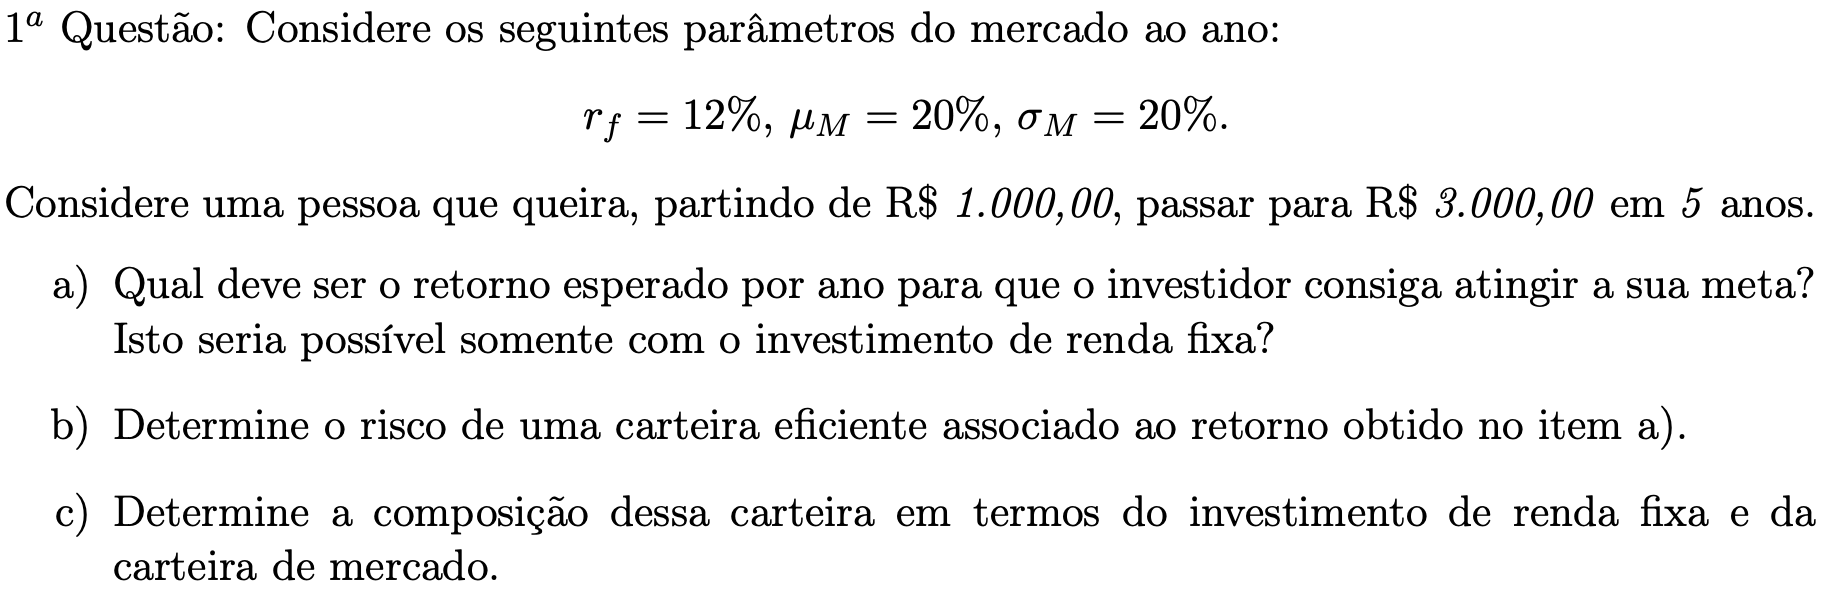

In [22]:
mu = (3000/1000)**(1/5) - 1
mu*100

24.57309396155174

#### a)
$$\mu = (\frac{3000}{1000})^{0.2} - 1 \approx 24.57\% $$

Não seria possível, pois a renda fixa rende apenas 12% ao ano

In [23]:
rf = 0.12
mu_market = 0.2
sigma_market = 0.2

sigma = (mu - rf)*sigma_market/(mu_market - rf)
sigma


0.3143273490387935

#### b)
$$ \mu = r_f + \frac{(\mu_M - r_f)}{\sigma_M}\sigma \implies \sigma = \frac{(\mu-r_f)*\sigma_M}{(\mu_M - r_f)}$$

$$\sigma = 31.43\%$$

In [33]:
risk_w = (mu - mu_market)/(rf - mu_market)
print(f'Proporção renda fixa: {risk_w*100 :.4}%')
print(f'Proporção carteira de mercado: {(1-risk_w)*100 :.4}%')


Proporção renda fixa: -57.16%
Proporção carteira de mercado: 157.2%


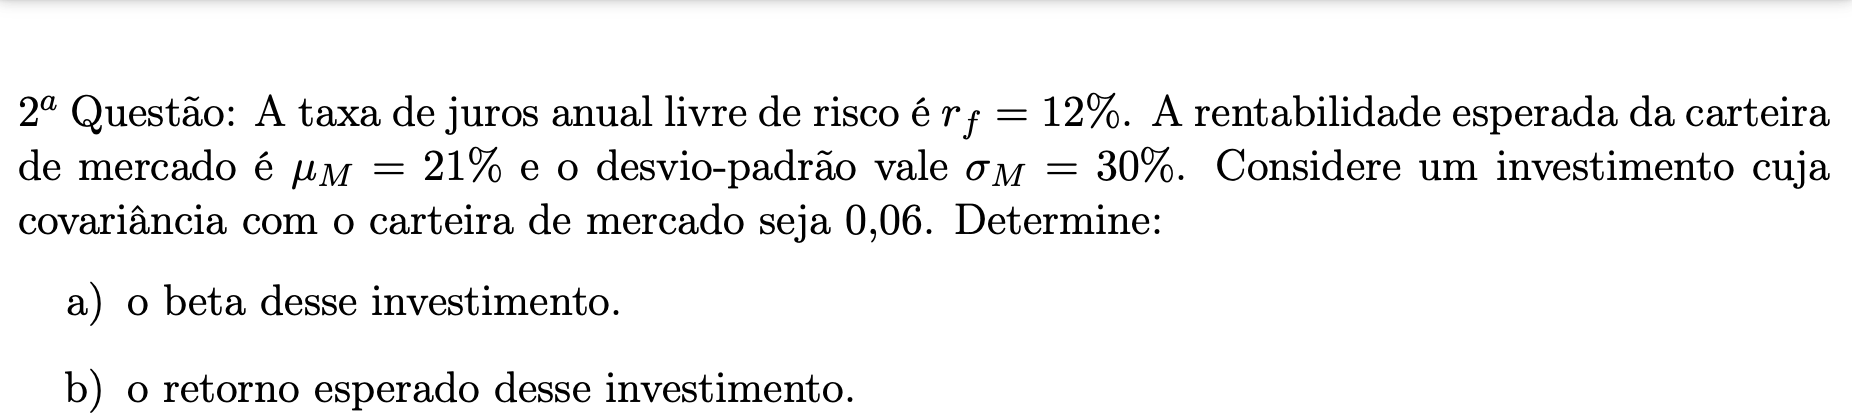

In [43]:
rf = 0.12
mu_m = 0.21
sigma_m = 0.3

desired_cov = 0.06

beta = desired_cov/(sigma_m**2)

mu = rf + (mu_m - rf)*beta
print(f'Retorno Esperado: {mu :.4}')
print(f'Beta: {beta :.4}')

Retorno Esperado: 0.18
Beta: 0.6667


#### a)

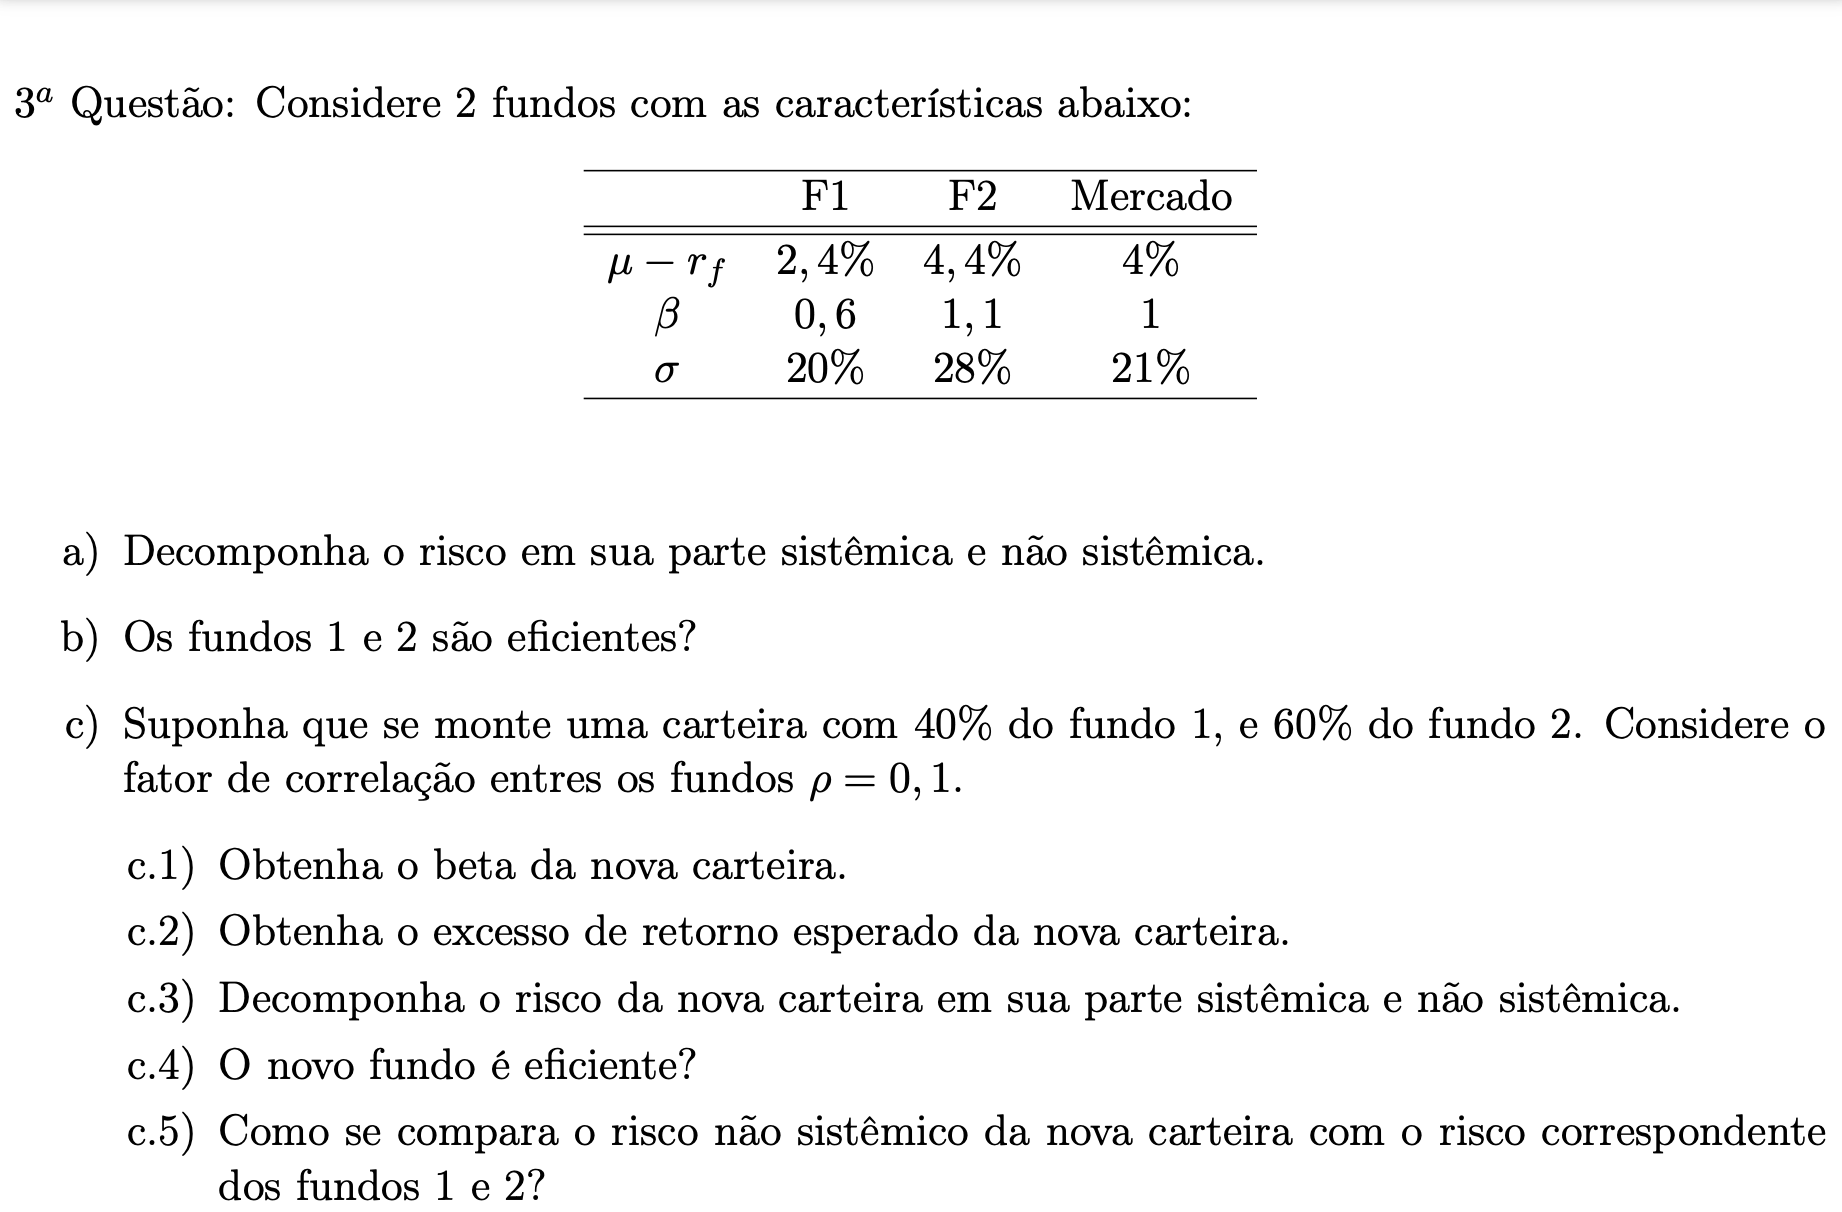

#### a)




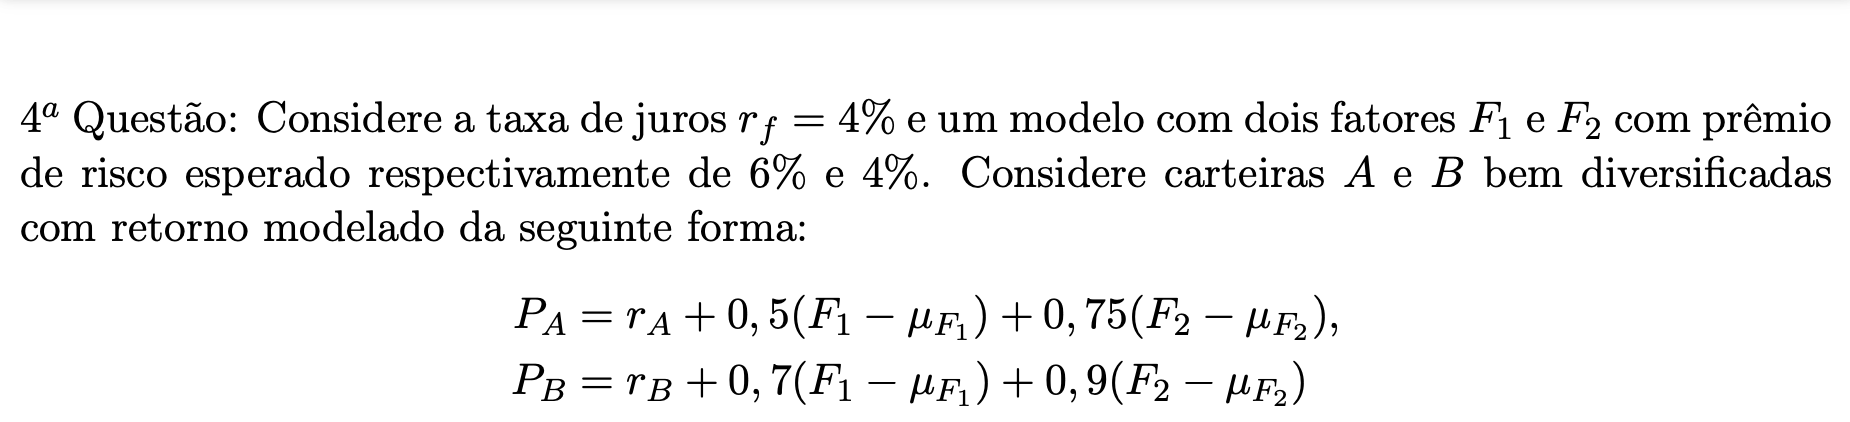
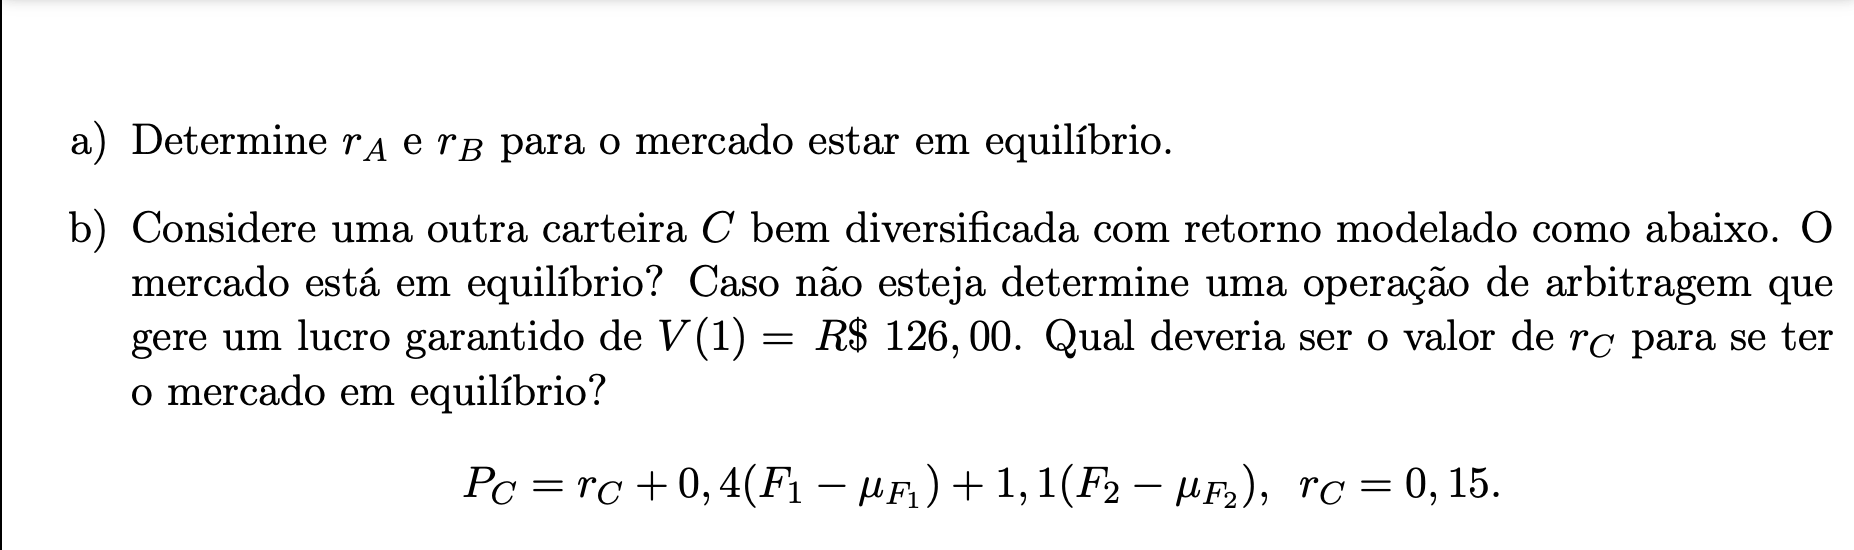

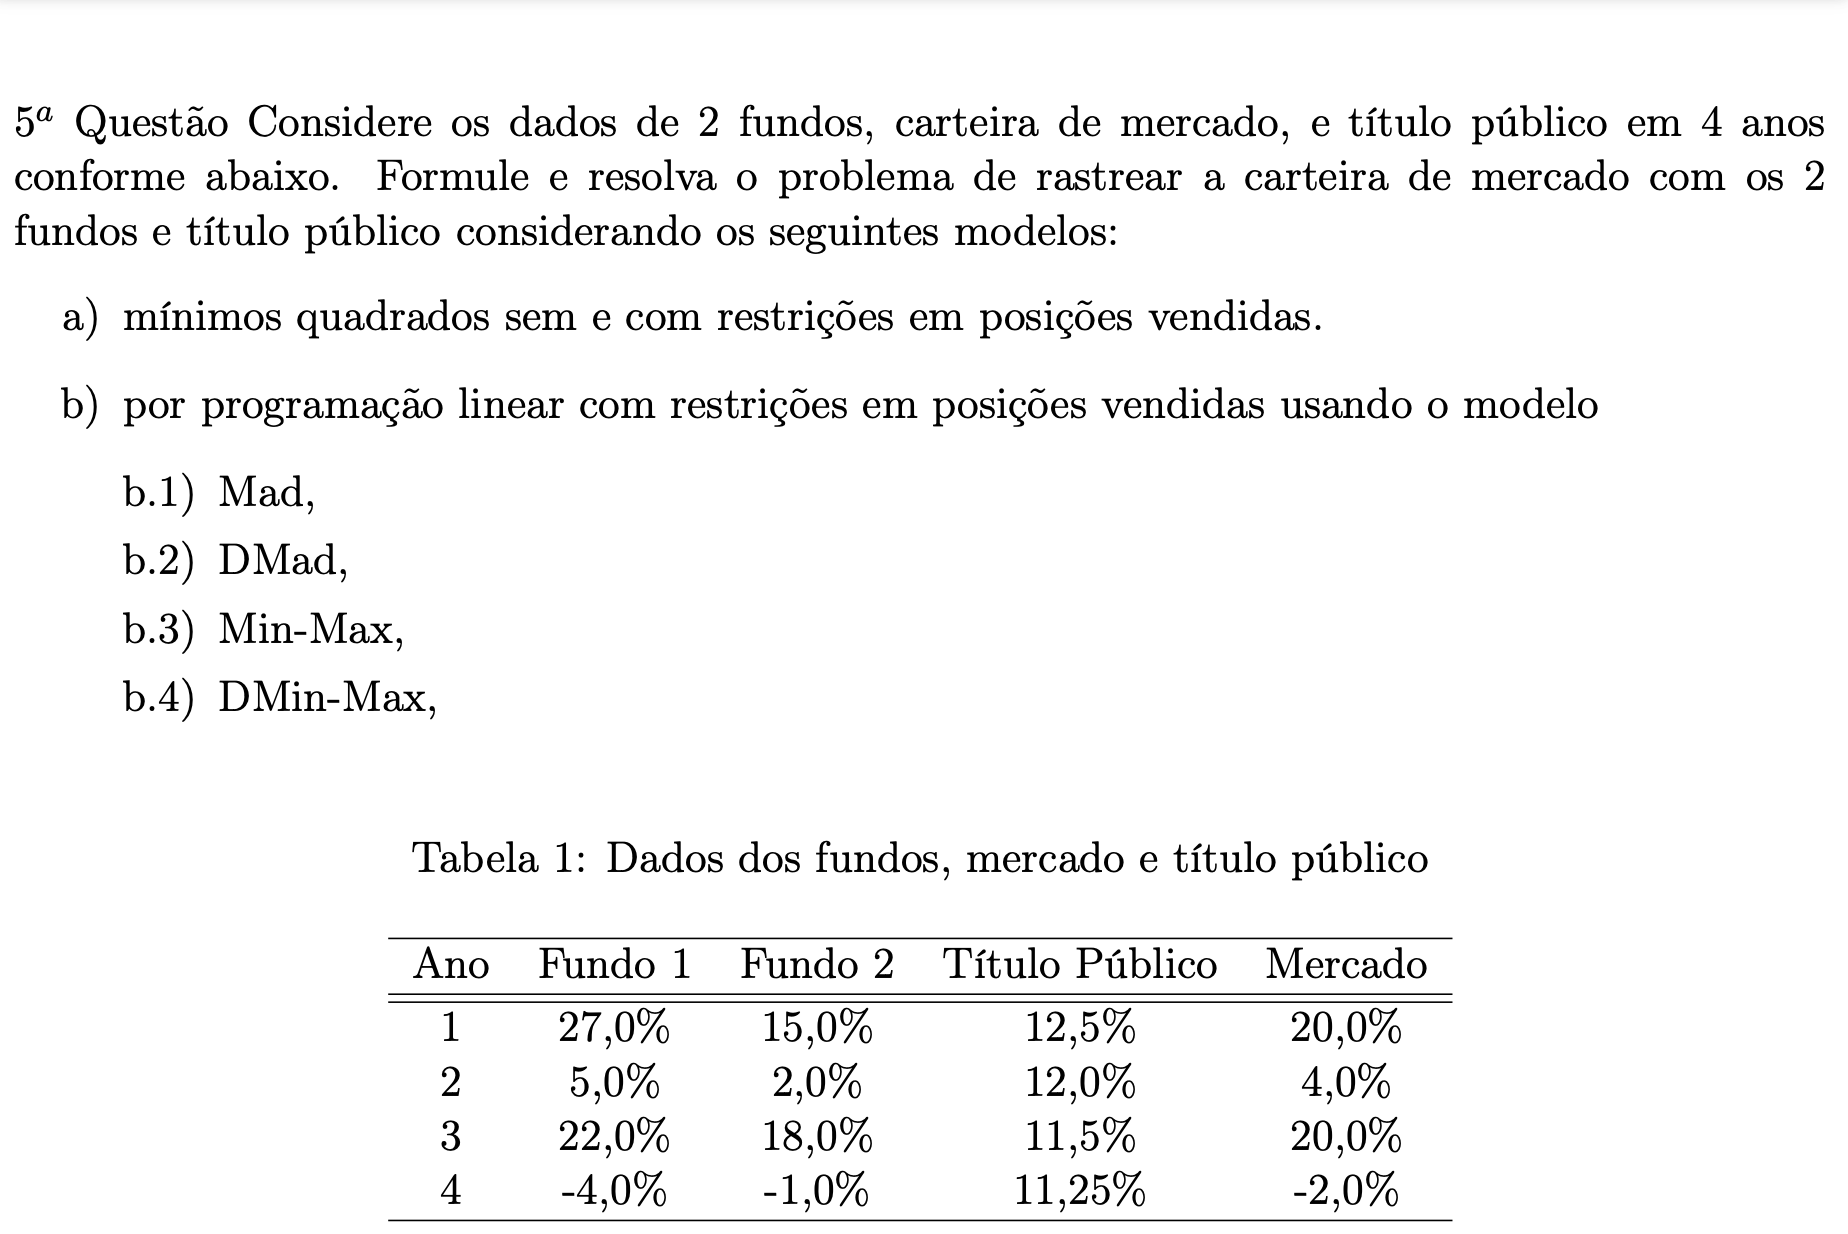

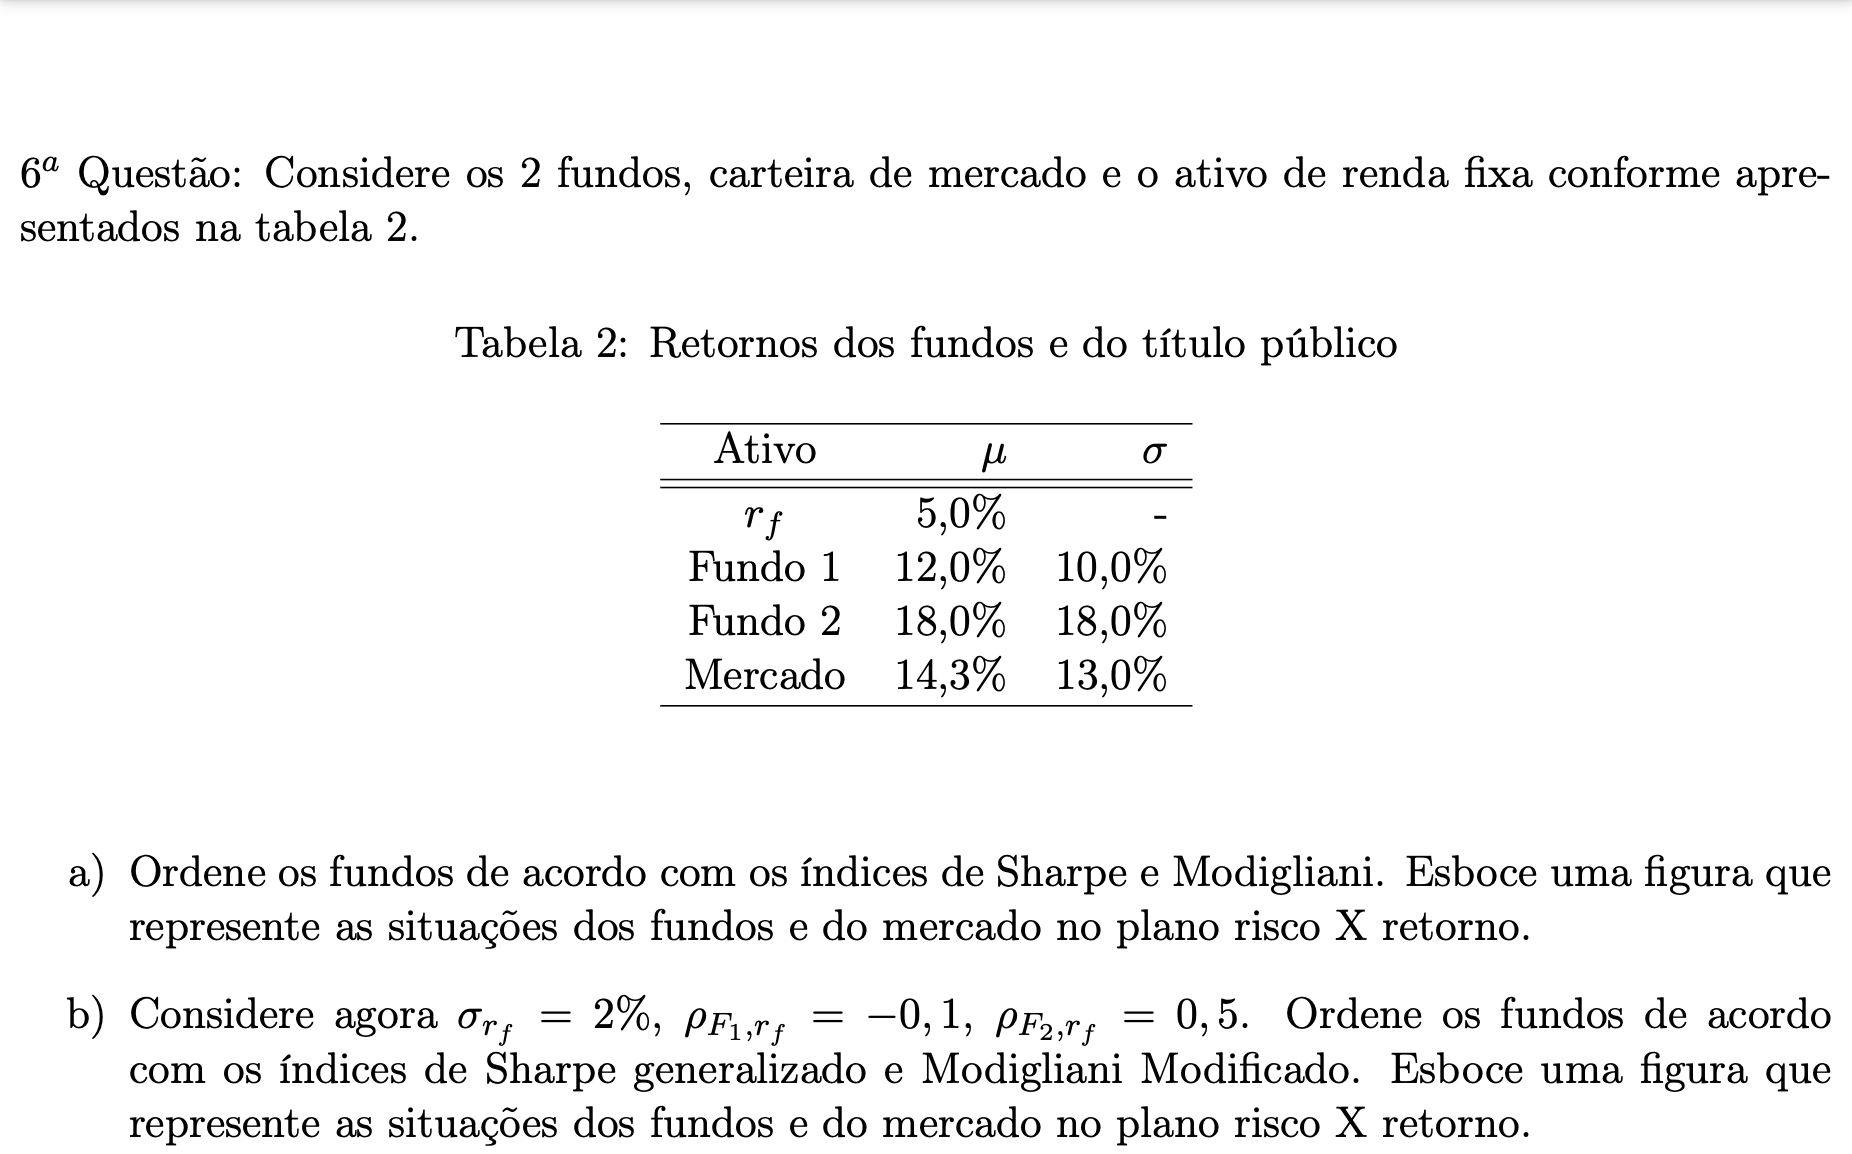

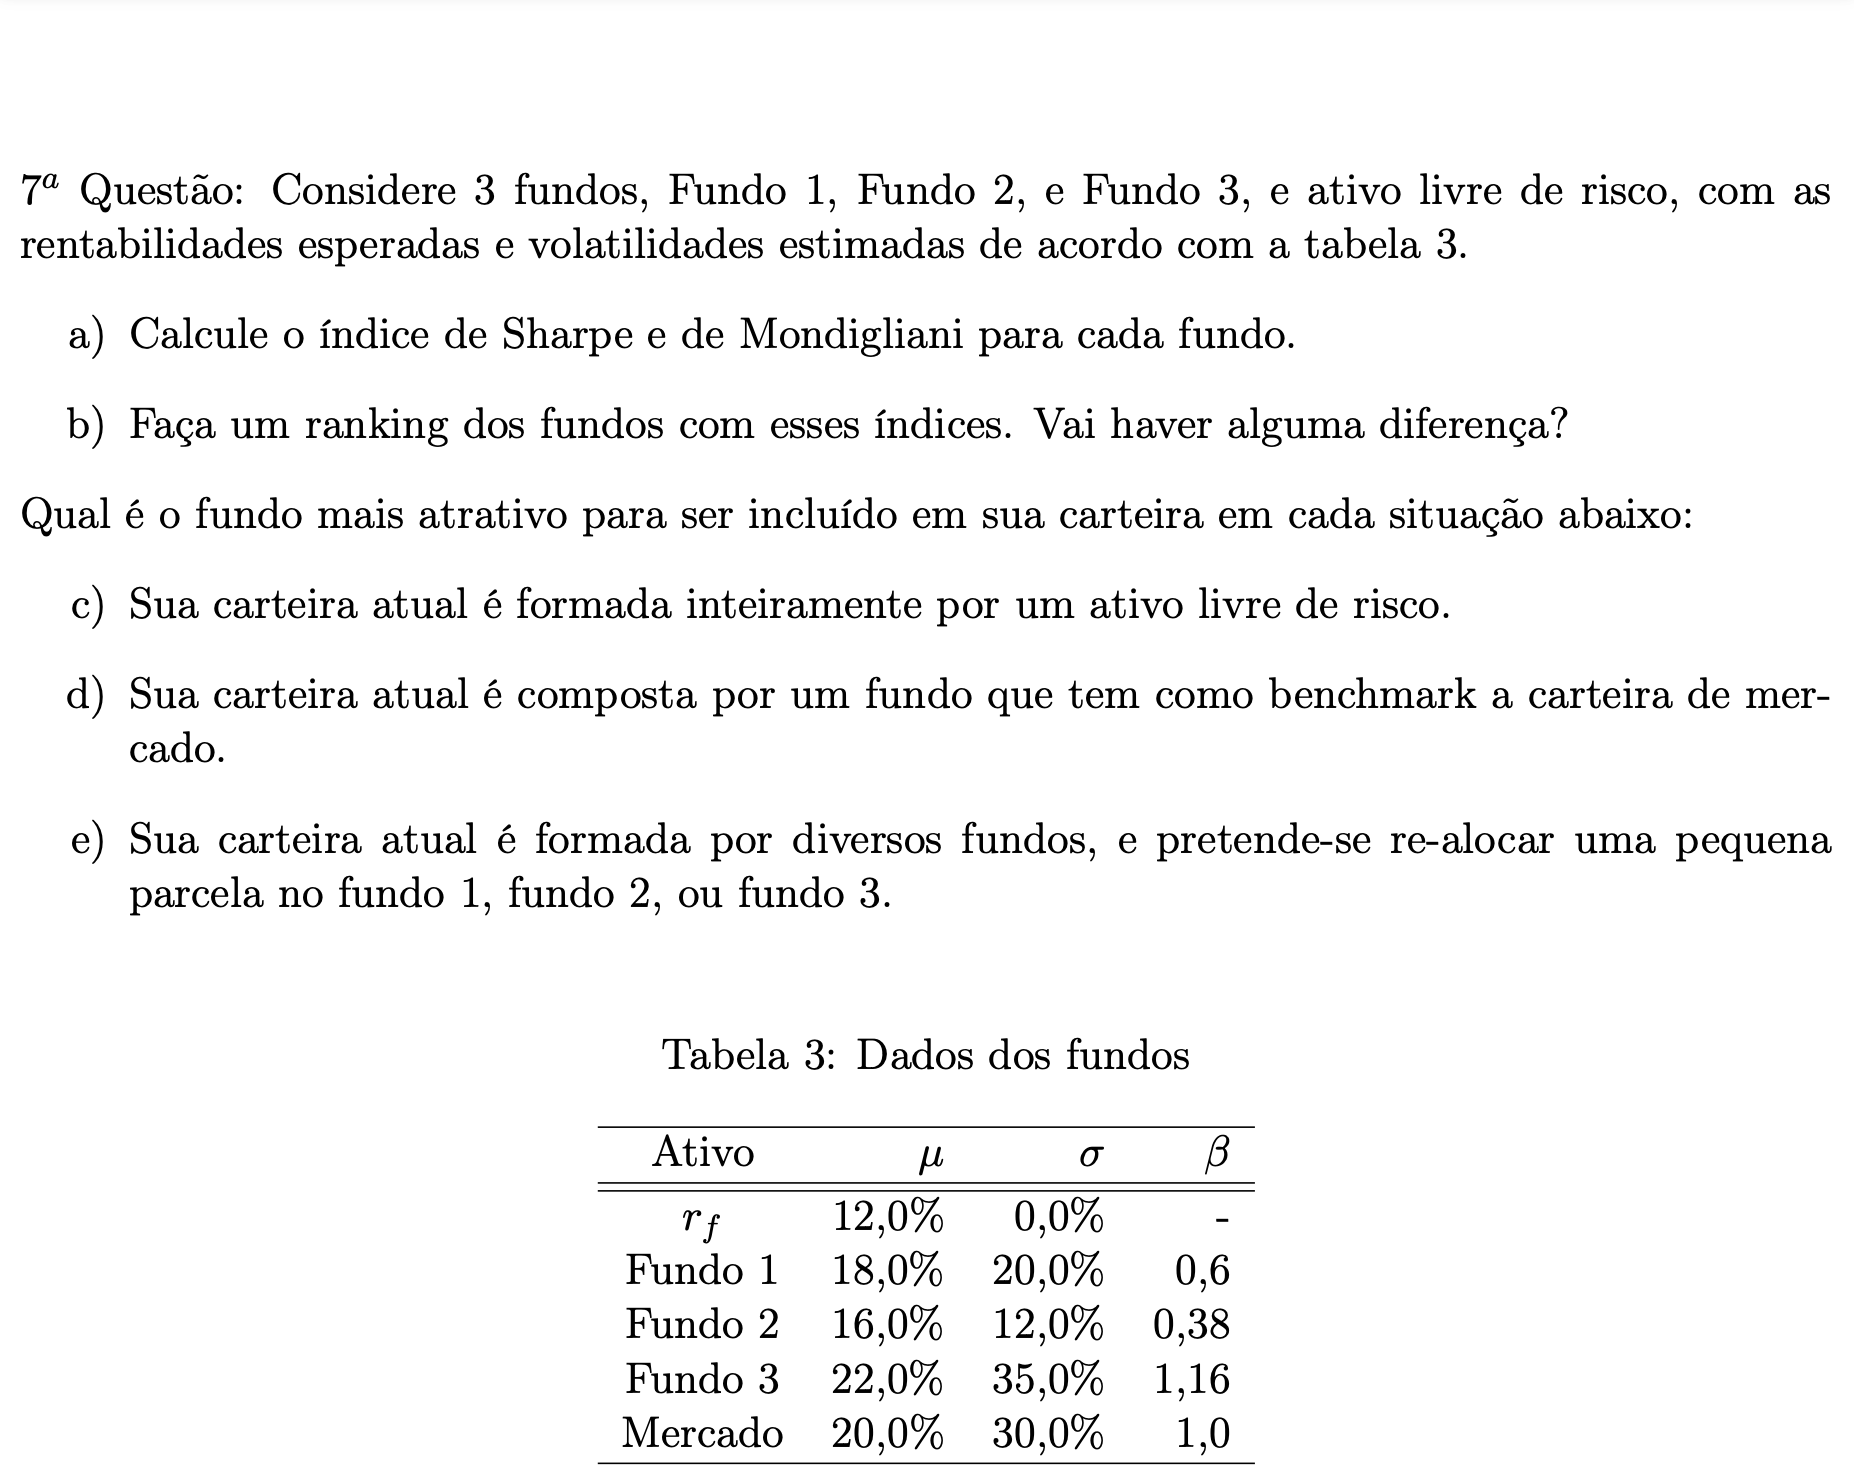